In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
#function to calculate the keltner channel
def keltner_channels(data, window=20, atr_multiplier=1):

  #Create an empty dictionary
  keltner_channels = {}

  #Calculate the typical price
  typical_price = (data['High'] + data['Low'] + data['Close']) / 3

  #Calculate the exponential moving average
  exponential_moving_average = typical_price.ewm(span=window, adjust=False).mean()

  #Calculate the ATR
  true_range = np.maximum(data['High'] - data['Low'], np.abs(data['High'] - data['Close'].shift(1)), np.abs(data['Low'] - data['Close'].shift(1)))

  average_true_range = true_range.ewm(span=window, adjust=False).mean()

  #Calculate the upper and lower bands
  keltner_channels['Upper'] = exponential_moving_average + (atr_multiplier * average_true_range)
  keltner_channels['Lower'] = exponential_moving_average - (atr_multiplier * average_true_range)

  #keltner channel middle band
  keltner_channels['Middle'] = exponential_moving_average

  return keltner_channels

In [38]:
import matplotlib.pyplot as plt

def plot_keltner_channels(data, keltner_channels):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the data
    ax.plot(data.index, data['Close'], label='Close Price', color='blue')

    # Plot the keltner channels
    ax.plot(data.index, keltner_channels['Upper'], label='Upper Channel', color='red')
    ax.plot(data.index, keltner_channels['Middle'], label='Middle Channel', color='green')
    ax.plot(data.index, keltner_channels['Lower'], label='Lower Channel', color='red')

    # Shade the area between the bands
    ax.fill_between(data.index, keltner_channels['Upper'], keltner_channels['Lower'], color='grey', alpha=0.2)

    # Plot the buy and sell signals
    crossed = False
    for i in range(1, len(data)):
        if data['Close'].iloc[i] > keltner_channels['Upper'].iloc[i] and not crossed:
            ax.scatter(data.index[i], data['Close'].iloc[i], marker='^', color='green')
            crossed = True
        elif data['Close'].iloc[i] < keltner_channels['Lower'].iloc[i] and crossed:
            ax.scatter(data.index[i], data['Close'].iloc[i], marker='v', color='red')
            crossed = False

    ax.set_title('Keltner Channels with Buy and Sell Signals')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    plt.show()


In [39]:
data = pd.read_csv('BTC-USD.csv')
print(data)

            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2708  2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709  2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710  2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711  2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712  2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002 

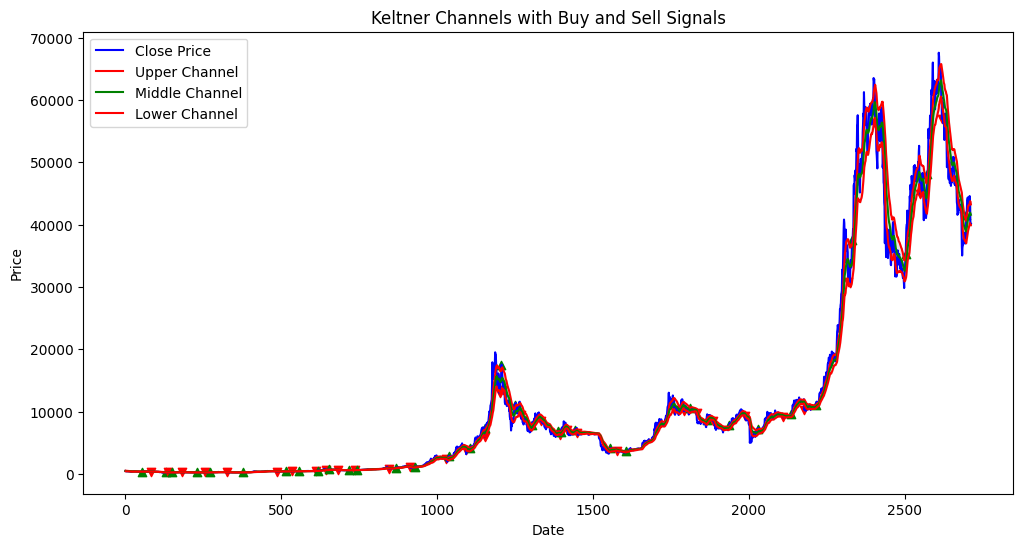

In [40]:
#Get the keltner channels
keltner_channels = keltner_channels(data , window=20, atr_multiplier=1)
#Plot the data and the keltner channels
plot_keltner_channels(data, keltner_channels)
